In [10]:
from gquant.dataframe_flow import TaskGraph

In [11]:
from dask_cuda import LocalCUDACluster
from dask.distributed import Client

cluster = LocalCUDACluster()
client = Client(cluster)
client

/home/quant/miniconda3/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43079 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:40351 Dashboard: http://127.0.0.1:43079/status,Cluster Workers: 4 Cores: 4 Memory: 270.39 GB


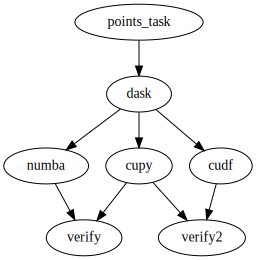

In [12]:
task_graph = TaskGraph.load_taskgraph('workflow/test_run_dask.gq.yaml')
task_graph.draw(show='ipynb', fmt='svg')


In [13]:
e=task_graph.draw()

In [14]:
e

GQuantWidget(value=[OrderedDict([('id', 'points_task'), ('type', 'PointNode'), ('conf', {'npts': 8000}), ('inp…

In [15]:
e

GQuantWidget(cache={'nodes': [{'width': 110, 'id': 'points_task', 'type': 'PointNode', 'schema': {'title': 'Po…

In [21]:
task_graph.run()

Result(verify2_max_diff=2.220446049250313e-16)

In [13]:

out_list = [
    'verify.max_diff', 'verify2.max_diff'
]

diff = task_graph.run(out_list)

In [14]:
diff

{'verify.max_diff': 0.0, 'verify2.max_diff': 2.220446049250313e-16}

In [8]:
task_graph.save_taskgraph('workflow/test_run.gq.yaml')
